# **Binary Classification with a Tabular Kidney Stone Prediction**

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
sample_submission = "/content/sample_submission.csv"

In [3]:
train_df.shape

(414, 8)

In [4]:
test_df.shape

(276, 7)

In [5]:
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [6]:
test_df.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [7]:
train_df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [8]:
test_df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


**Data Preprocessing**

Missing Values

In [12]:
#checking for null values
train_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [13]:
test_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

Finding Duplicate Values

In [14]:
train_df.duplicated().sum()

0

In [15]:
test_df.duplicated().sum()

0

# Exploratory data analysis (EDA)

DataFrame Head:


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0


DataFrame Tail:


,id,gravity,ph,osmo,cond,urea,calc,target
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1
413,413,1.011,6.13,364,9.9,159,0.27,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(414, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
id,414,206.5,206.5,119.656,0,103.25,206.5,309.75,413,0.000000,-1.200014
gravity,414,1.018,1.018,0.007,1.005,1.012,1.018,1.022,1.04,0.289954,-0.019158
ph,414,5.955,5.74,0.642,4.76,5.53,5.74,6.28,7.94,0.967785,0.595484
osmo,414,651.546,679.5,234.677,187,455.25,679.5,840,1236,0.146861,-0.496470
cond,414,21.438,22.2,7.515,5.1,15.5,22.2,27.6,38,-0.211240,-0.680120
urea,414,278.657,277,136.442,10,170,277,385,620,0.327913,-0.573939
calc,414,4.115,3.13,3.218,0.17,1.45,3.13,6.63,14.34,1.114477,0.640783
target,414,0.444,0,0.498,0,0,0,1,1,0.223607,-1.950000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



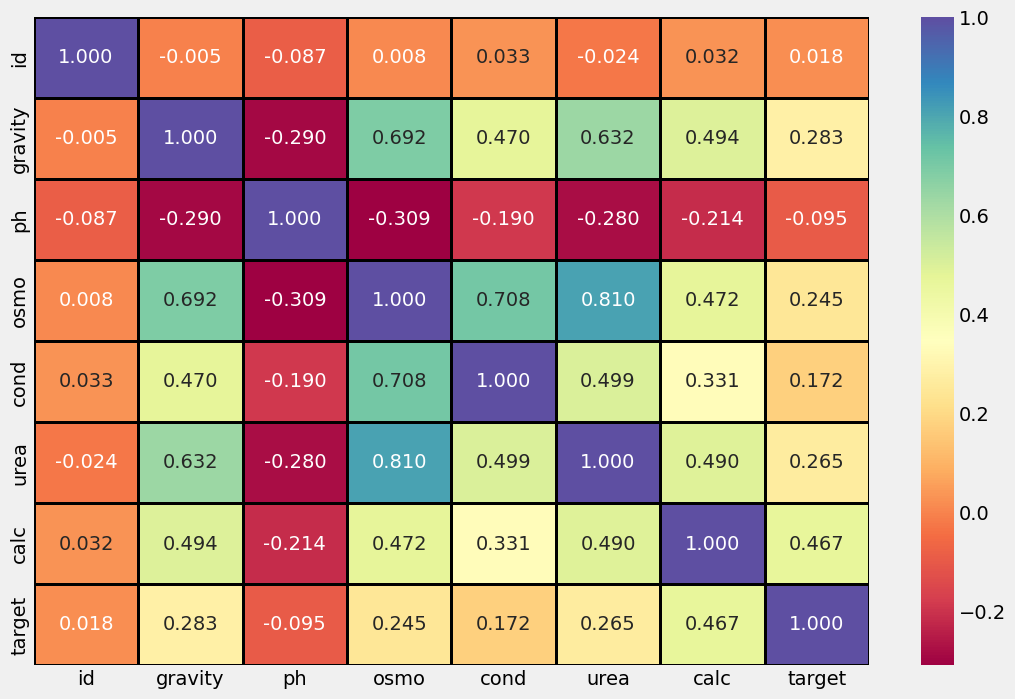

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



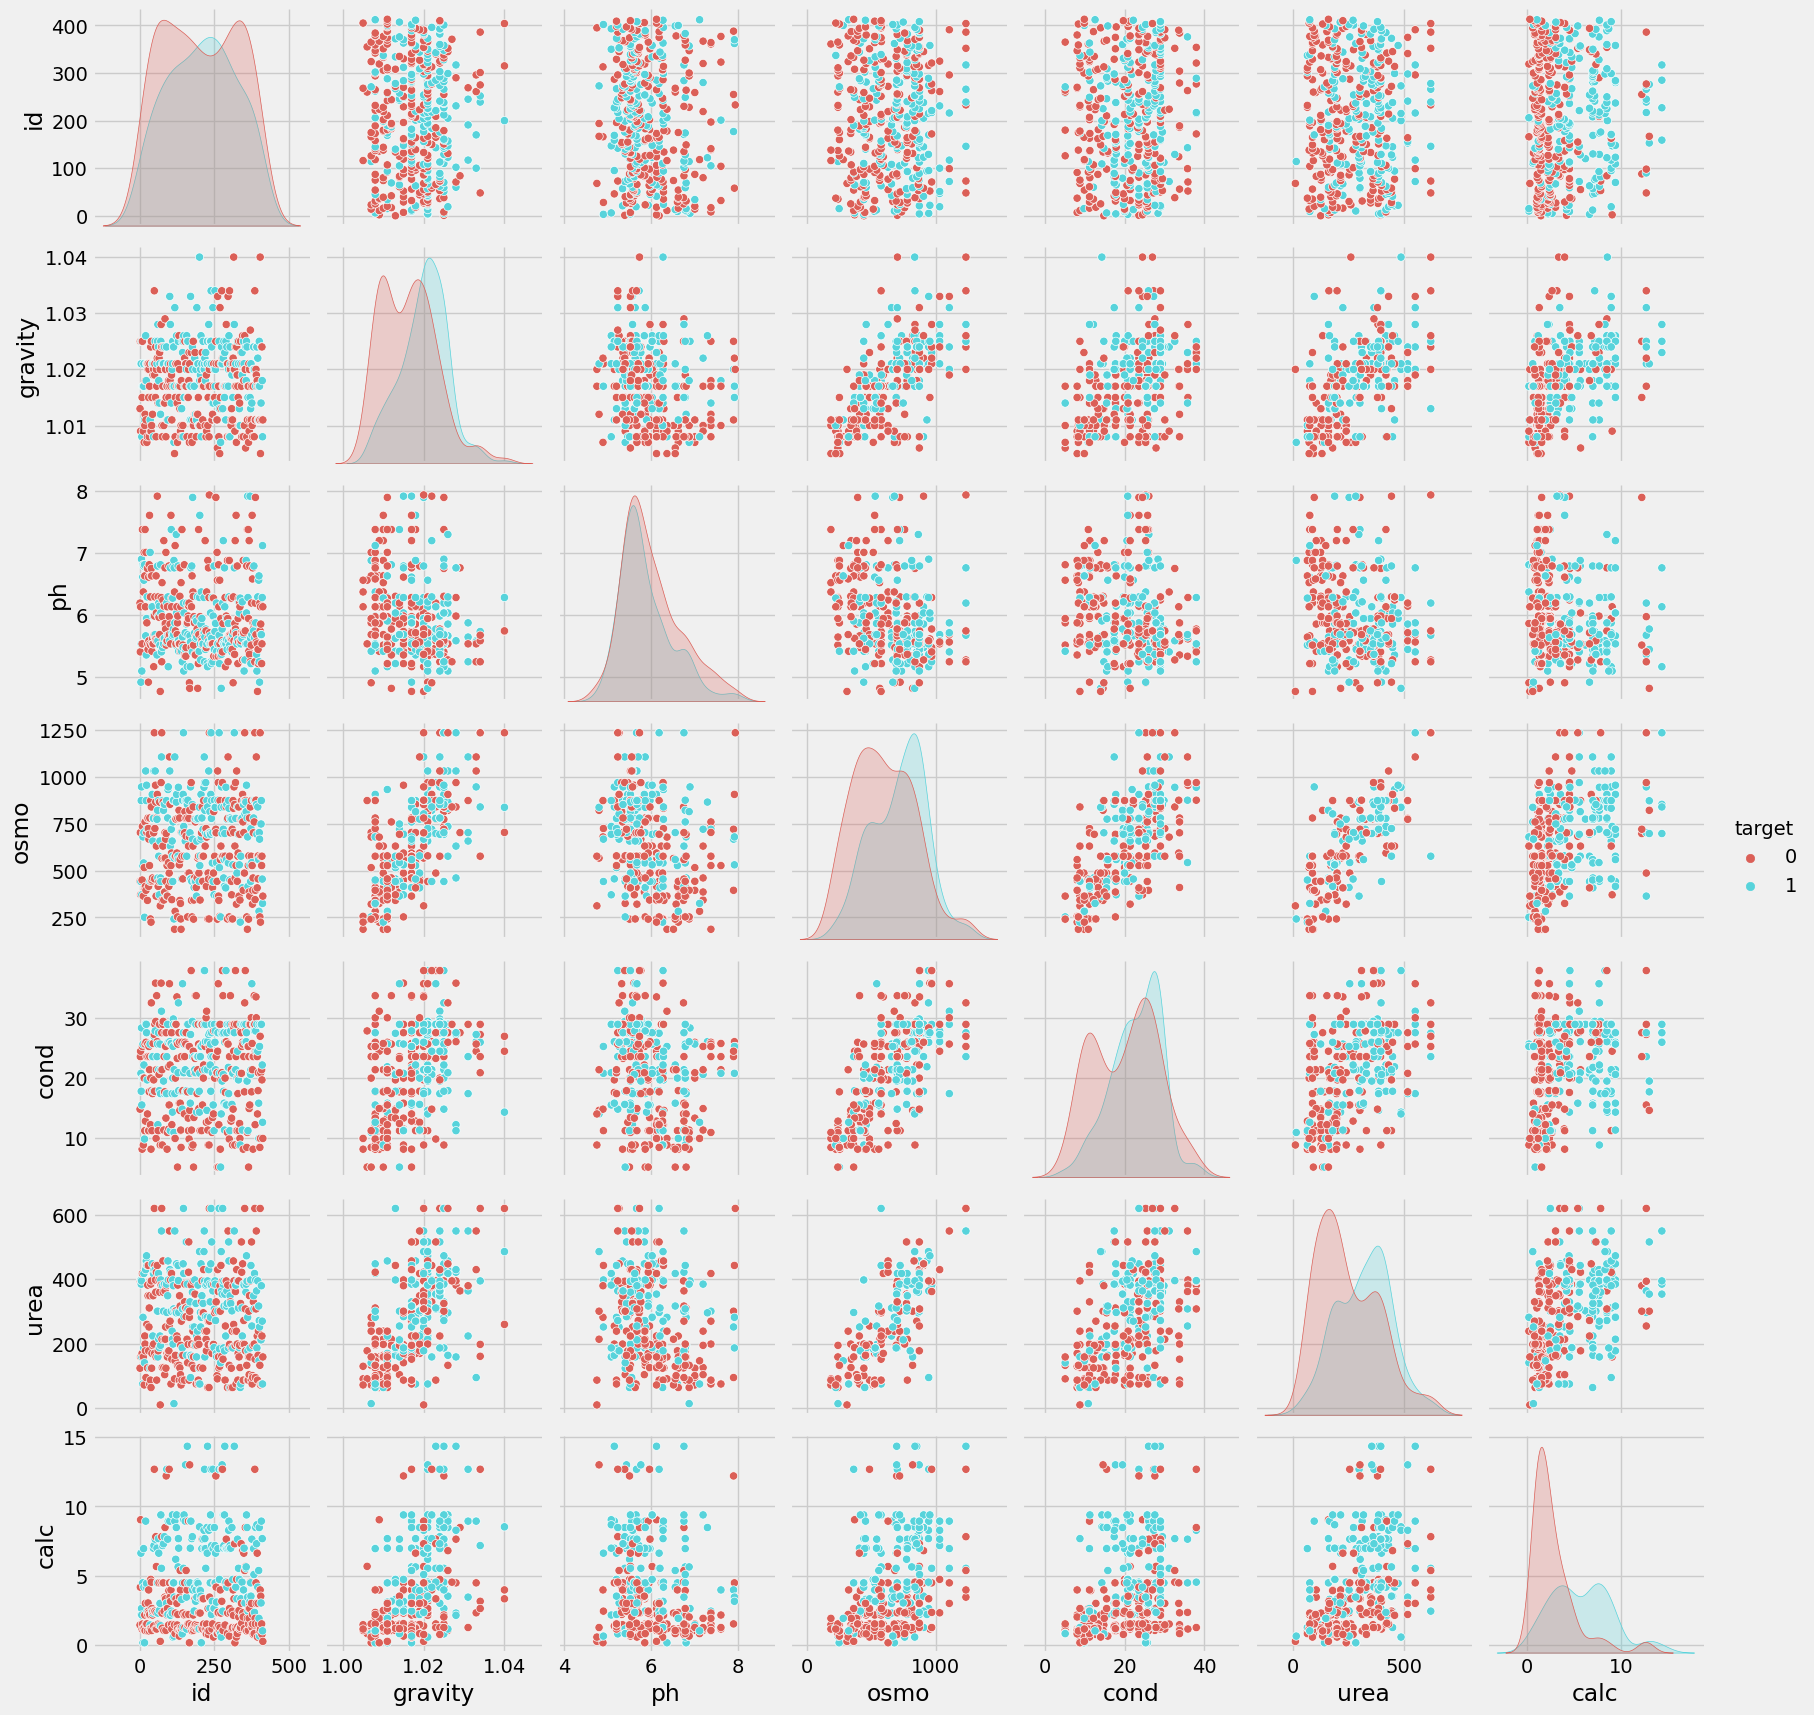

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



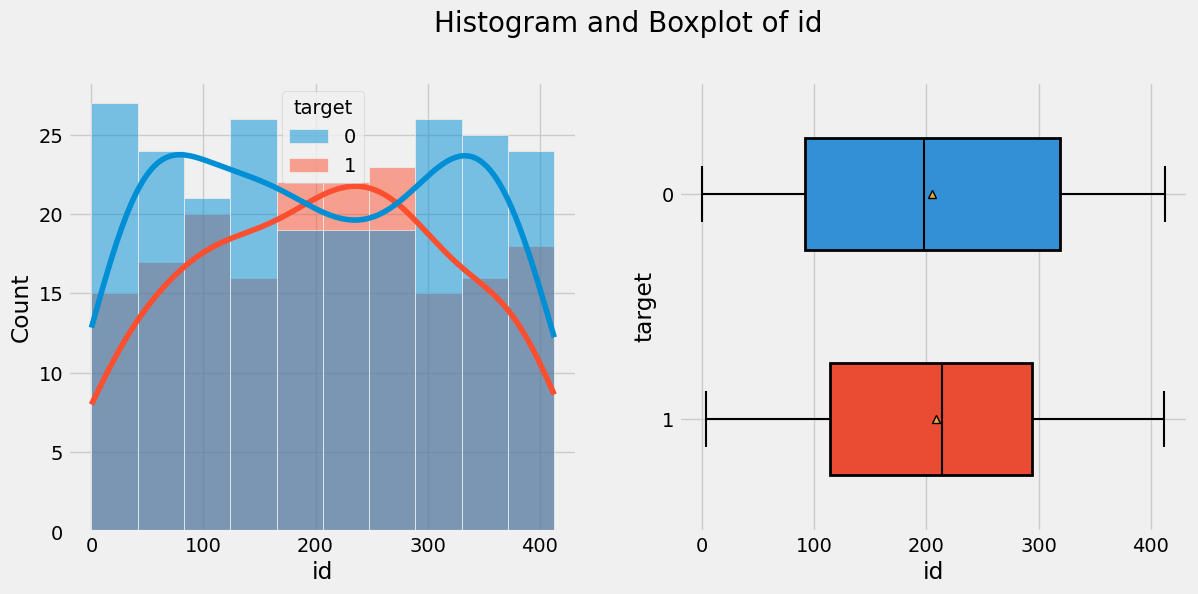

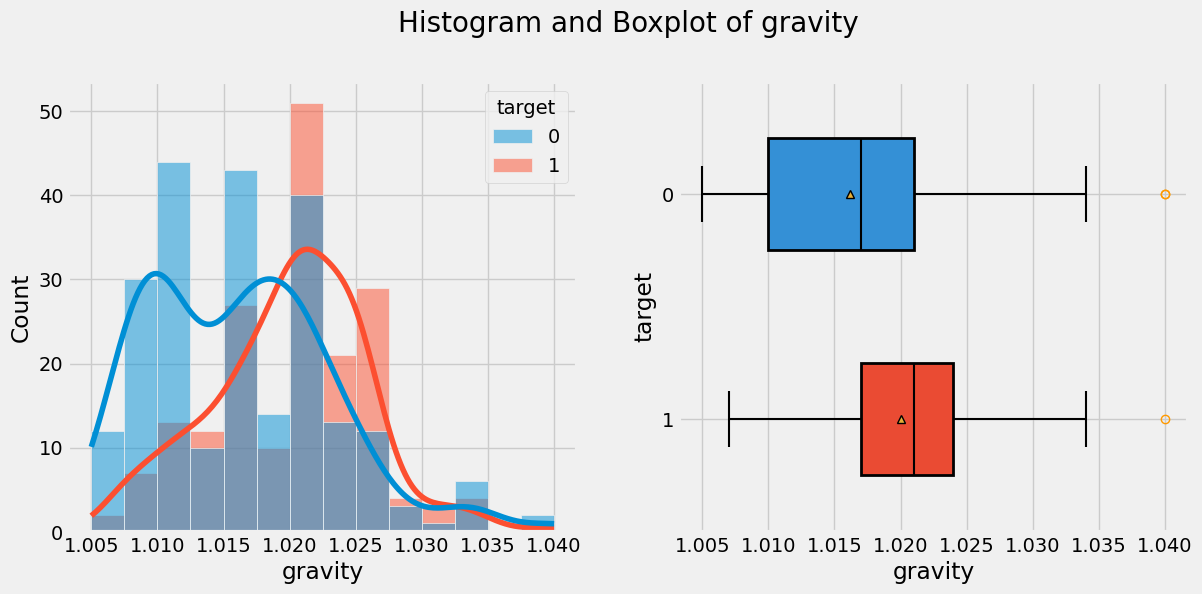

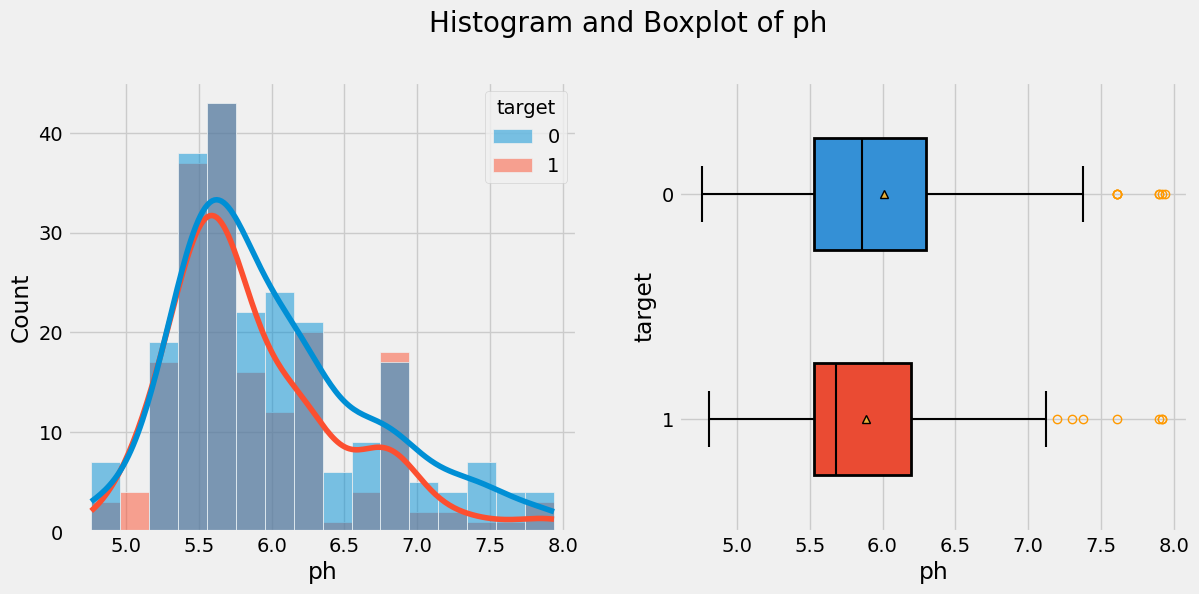

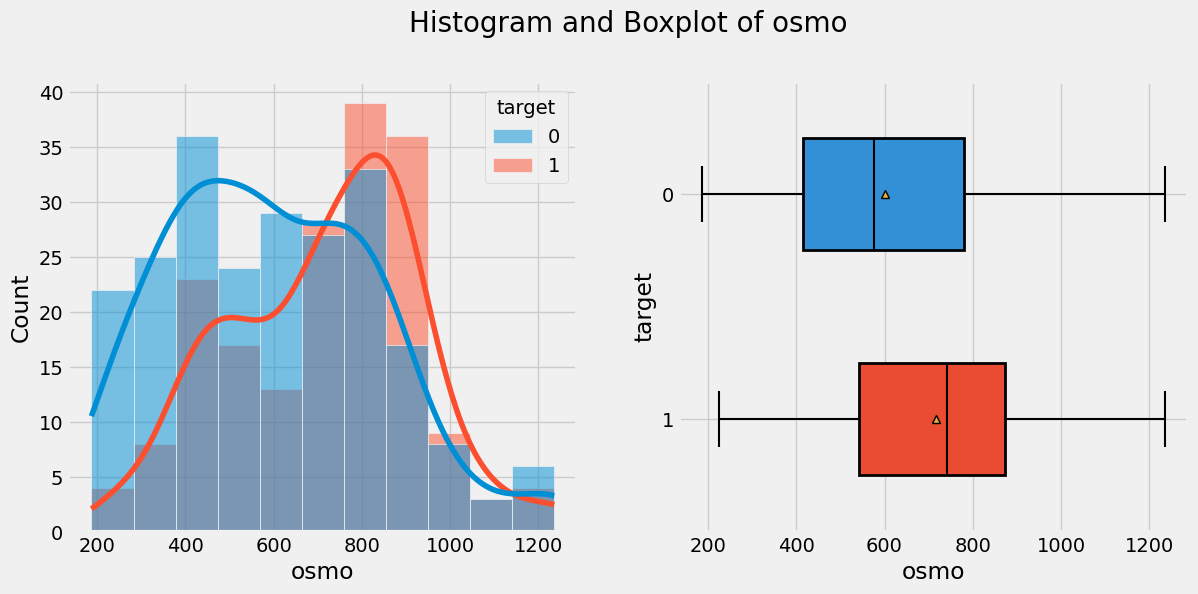

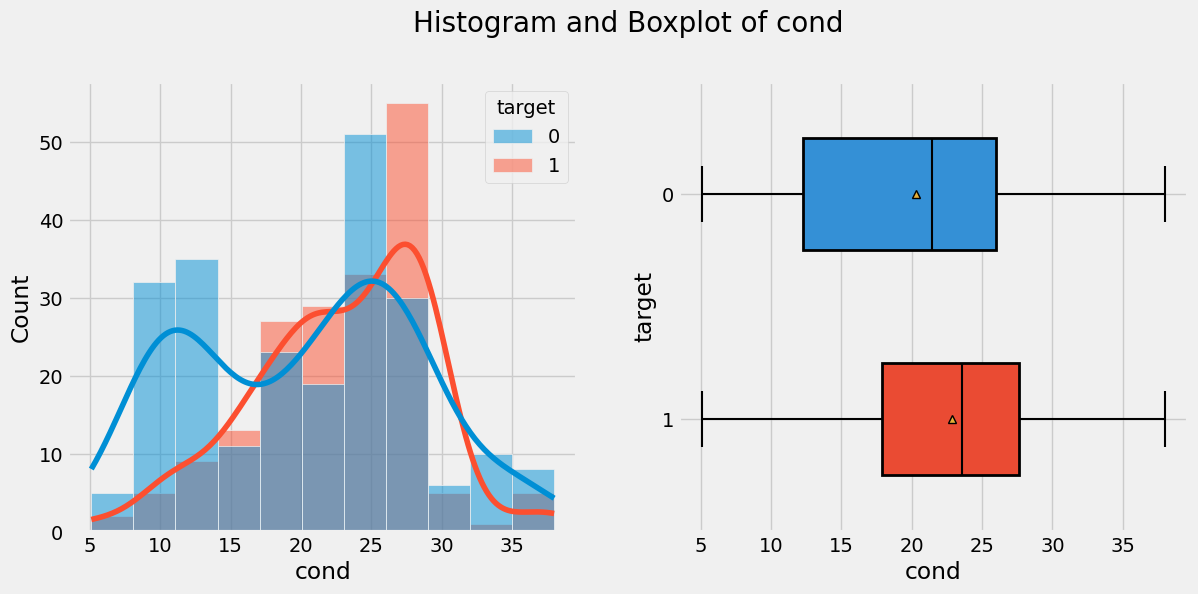

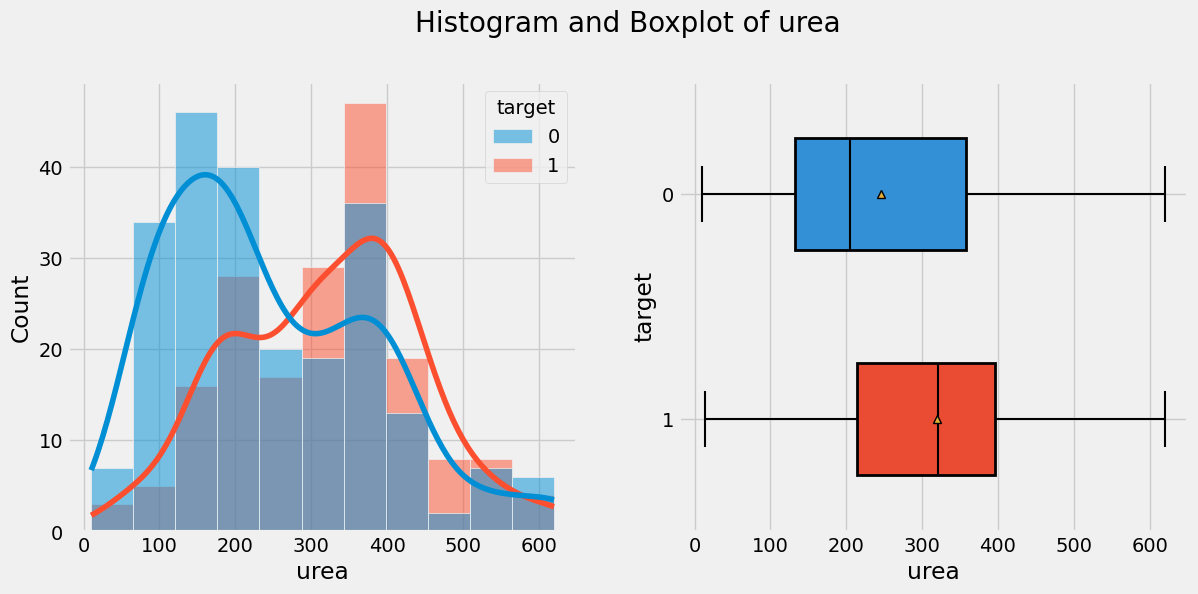

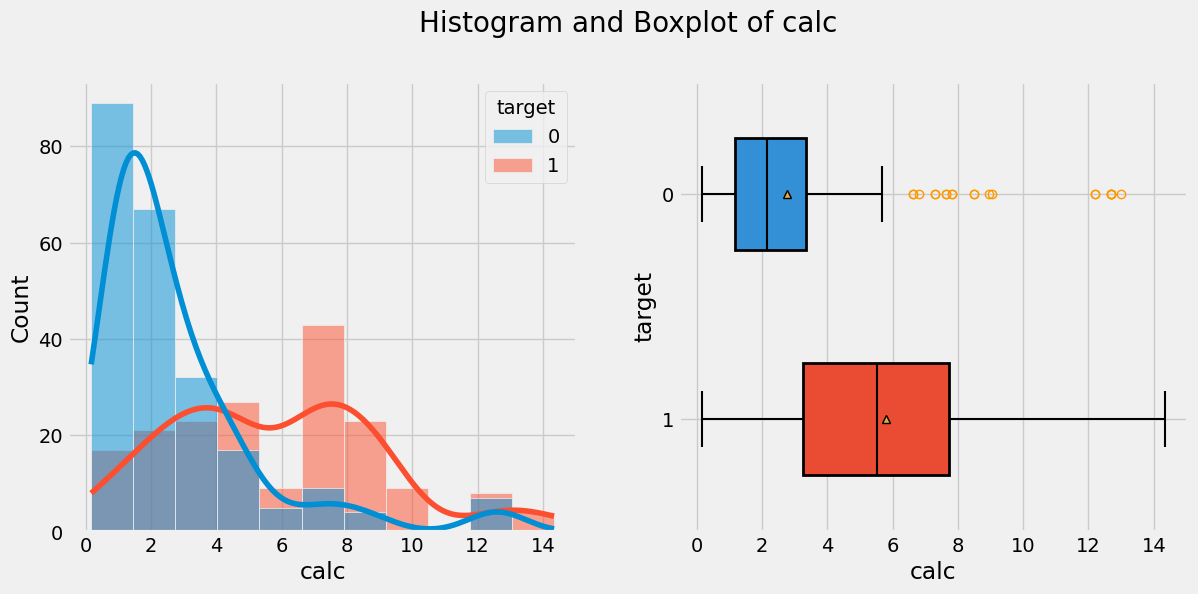

----------------------------------------------------------------------------------------------------
Countplot(s):



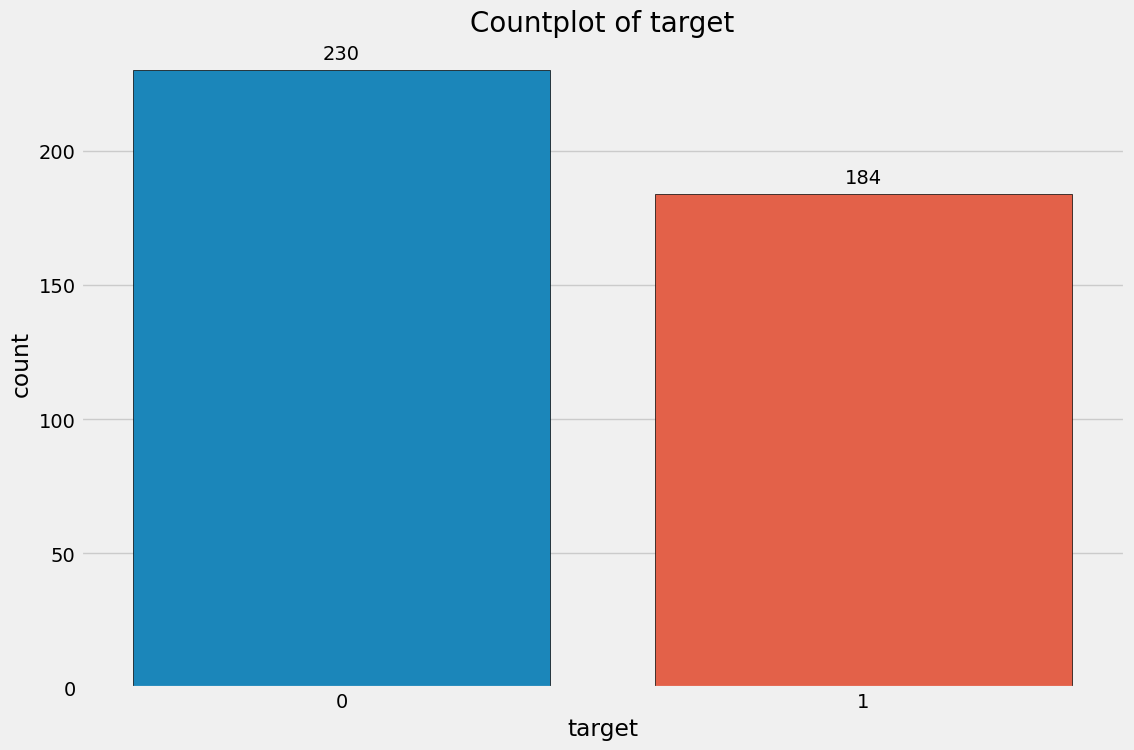

In [68]:
from fasteda import fast_eda
fast_eda(train_df, target = "target")

**Outlier Deduction and Correction**

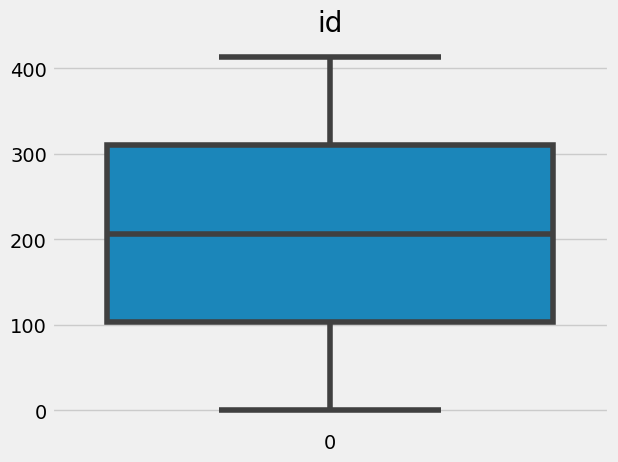

Number of outliers in id: 0


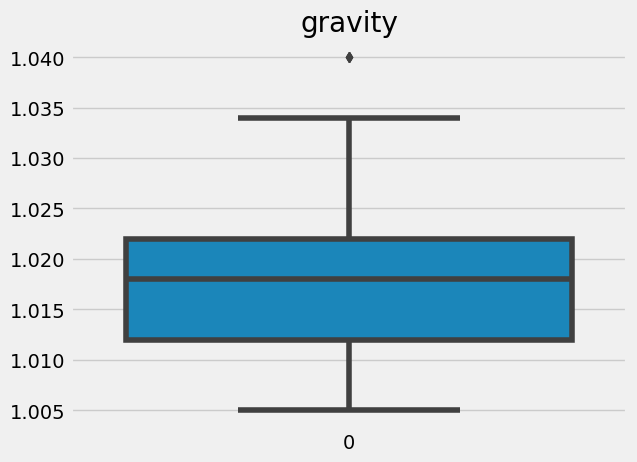

Number of outliers in gravity: 3


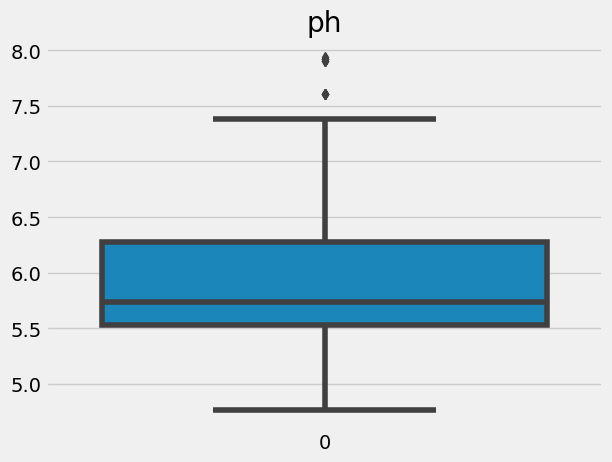

Number of outliers in ph: 12


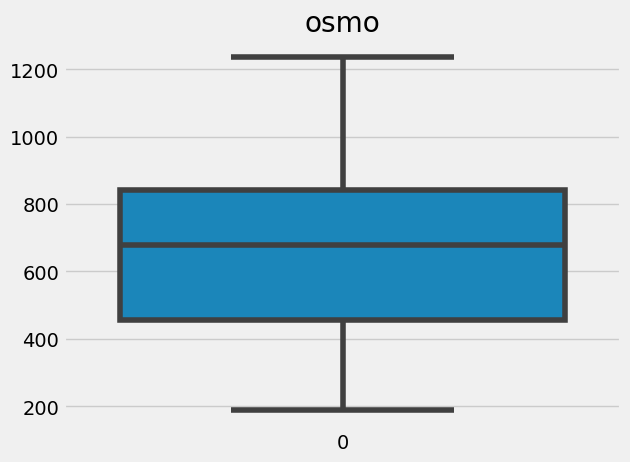

Number of outliers in osmo: 0


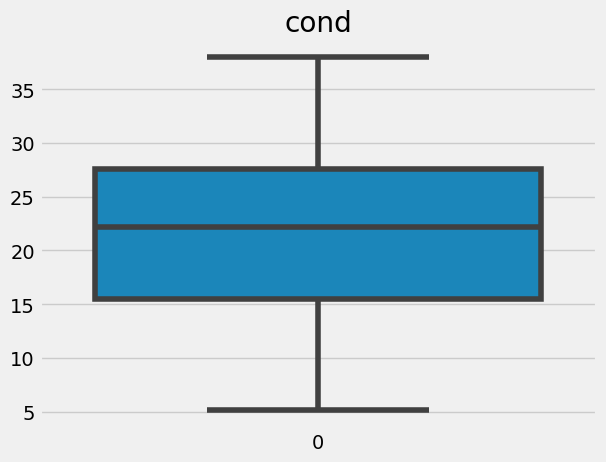

Number of outliers in cond: 0


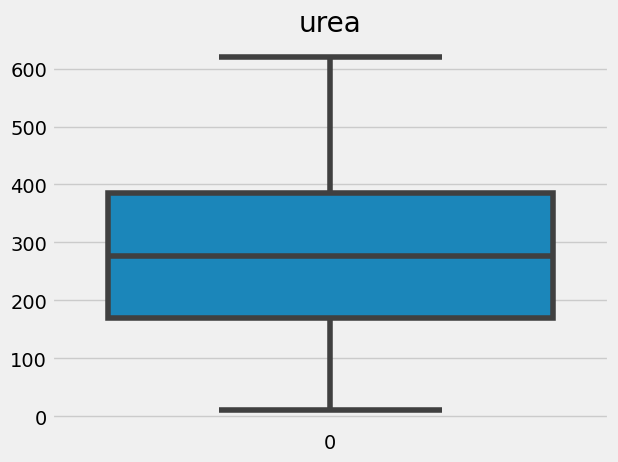

Number of outliers in urea: 0


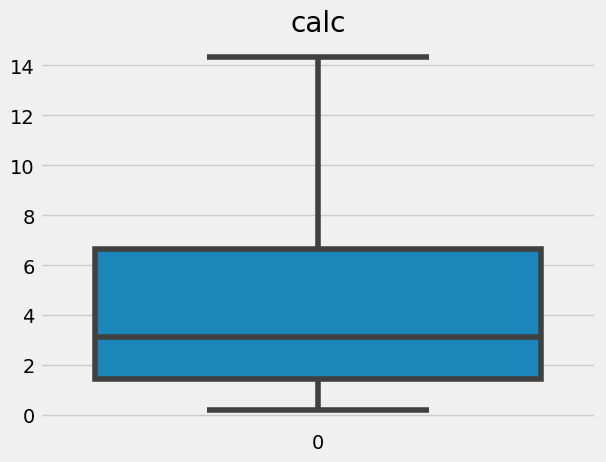

Number of outliers in calc: 0
Outliers:
None


In [69]:
# Plotting the boxplots to check the outiers in the dataset 

def detect_outliers(train_df):
    # Get all the column names
    columns = train_df.columns.tolist()
    
    # Remove the target column (assuming it's the last column)
    columns.remove('target')
    
    # Detect and plot outliers using boxplots
    for col in columns:
        sns.boxplot(train_df[col])
        plt.title(col)
        plt.show()

        # Calculate the upper and lower bounds for outliers using IQR
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Print the number of outliers detected
        num_outliers = len(train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)])
        print(f"Number of outliers in {col}: {num_outliers}")

outliers = detect_outliers(train_df)
print("Outliers:")
print(outliers)

In [70]:
train_df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [16]:
#detecting Outlier for ph column
iqr = train_df['ph'].quantile(0.75) - train_df['ph'].quantile(0.25)
upper_bound = train_df['ph'].quantile(0.75) + (1.5 * iqr)
lower_bound = train_df['ph'].quantile(0.25) - (1.5 * iqr)
upper_bound, lower_bound

(7.405, 4.405)

In [17]:
#removing outlier for ph column
# Clip/ Strip is used to detuct value to lower & upper bound.
train_df.ph	 = train_df.ph.clip(lower_bound,upper_bound)

In [18]:
#detecting Outlier for gravity column
iqr = train_df['gravity'].quantile(0.75) - train_df['gravity'].quantile(0.25)
upper_bound = train_df['gravity'].quantile(0.75) + (1.5 * iqr)
lower_bound = train_df['gravity'].quantile(0.25) - (1.5 * iqr)
upper_bound, lower_bound

(1.037, 0.997)

In [19]:
#removing outlier for gravity column
# Clip/ Strip is used to detuct value to lower & upper bound.
train_df.gravity	 = train_df.gravity.clip(lower_bound,upper_bound)

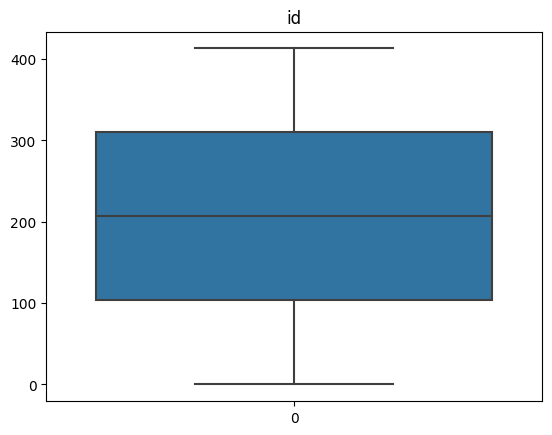

Number of outliers in id: 0


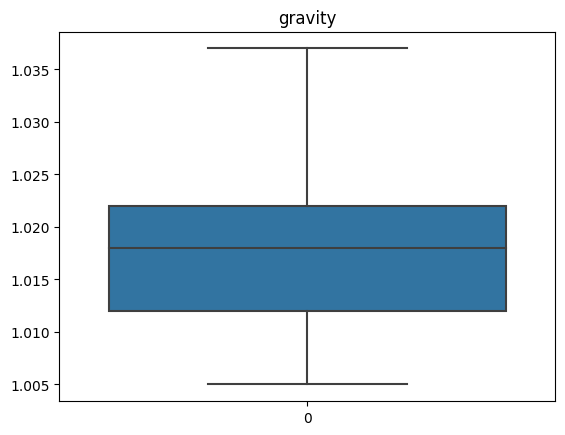

Number of outliers in gravity: 0


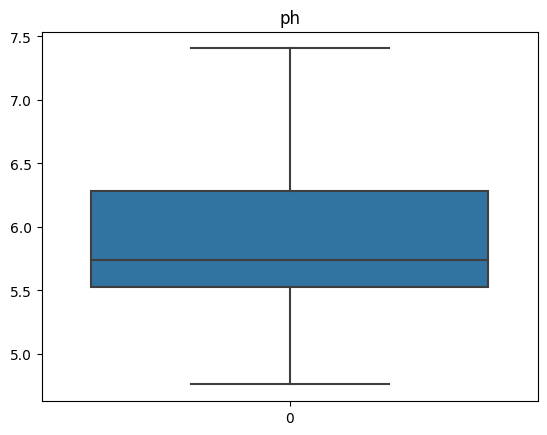

Number of outliers in ph: 0


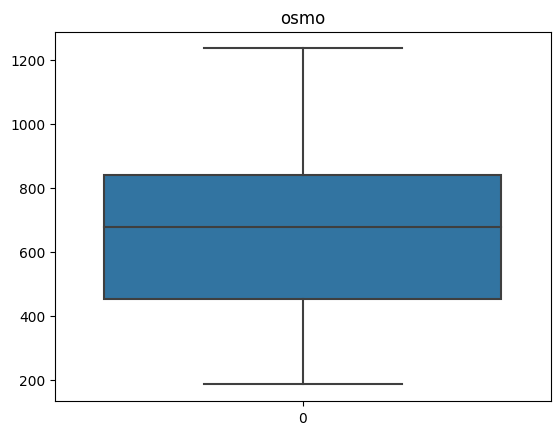

Number of outliers in osmo: 0


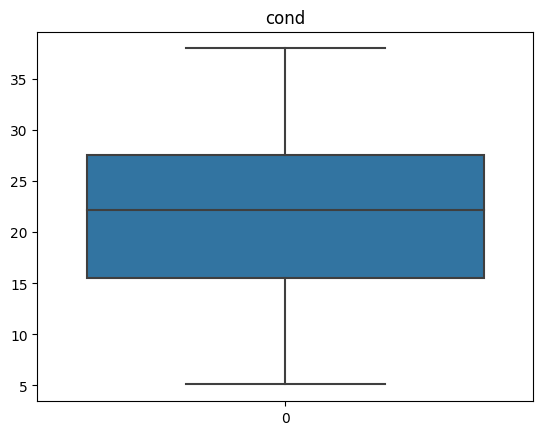

Number of outliers in cond: 0


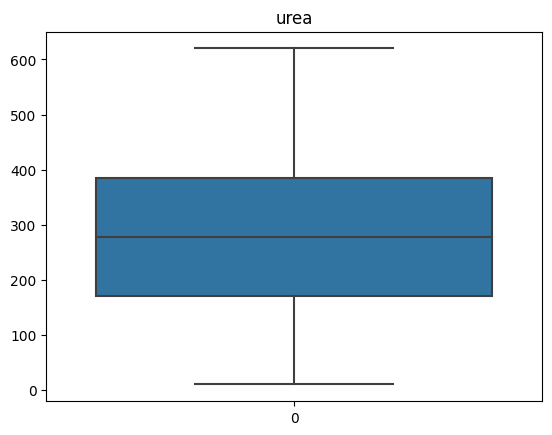

Number of outliers in urea: 0


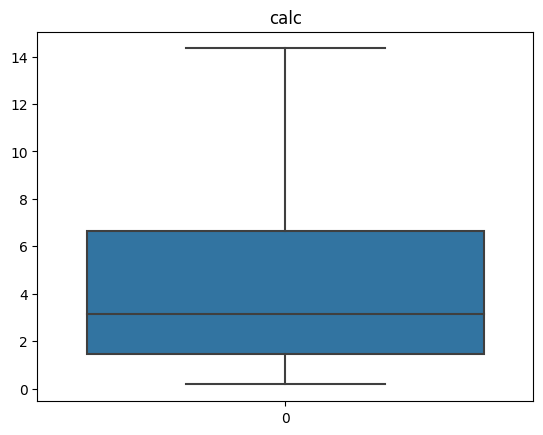

Number of outliers in calc: 0
Outliers:
None


In [20]:
# Plotting the boxplots to check the outiers in the dataset 

def detect_outliers(train_df):
    # Get all the column names
    columns = train_df.columns.tolist()
    
    # Remove the target column (assuming it's the last column)
    columns.remove('target')
    
    # Detect and plot outliers using boxplots
    for col in columns:
        sns.boxplot(train_df[col])
        plt.title(col)
        plt.show()

        # Calculate the upper and lower bounds for outliers using IQR
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Print the number of outliers detected
        num_outliers = len(train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)])
        print(f"Number of outliers in {col}: {num_outliers}")
outliers = detect_outliers(train_df)
print("Outliers:")
print(outliers)        

# MODEL

In [21]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
# Model Training
# Split the data into X and Y
from sklearn.model_selection import train_test_split
X = train_df.drop(['target'], axis=1)
y = train_df['target'] 
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=0.90, random_state=19)
Rfc_model = RandomForestClassifier(n_estimators=100)
# Fit the model to the training data
Rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
#make predictions for test data
y_pred = Rfc_model.predict(X_test)

In [24]:
# create a dataframe that will show our predicted results with the actual ones.
Compared_values=pd.DataFrame({'Actual_y':y_test,'Predict_Y':y_pred})
Compared_values.head()

,Actual_y,Predict_Y
307,0,0
143,1,1
171,1,1
181,0,0
187,1,0


[[17  3]
 [10 12]]


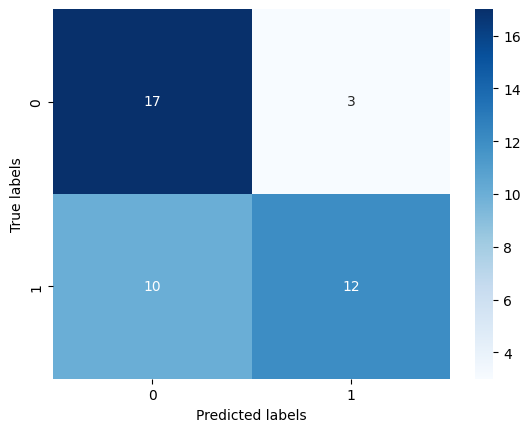

In [25]:
# Evaluate the model performance

cm = confusion_matrix(y_test, y_pred)
print(cm)
# plot the confusion_matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [26]:
# calculate the accuarcy of the model an
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the Random forest classifier model is:",accuracy*100)
print('-'*50)
print('classification_report:\n',classification_report(y_test,y_pred))

The accuracy of the Random forest classifier model is: 69.04761904761905
--------------------------------------------------
classification_report:
               precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.80      0.55      0.65        22

    accuracy                           0.69        42
   macro avg       0.71      0.70      0.69        42
weighted avg       0.72      0.69      0.68        42



In [27]:
# predict with the test dataset 
result = Rfc_model.predict(test_df)
result

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [83]:
ypred_test_data = Rfc_model.predict(test_df)
ypred_test_data

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [84]:
ypred_test_data_proba = Rfc_model.predict_proba(test_df)
ypred_test_data_proba

array([[0.58, 0.42],
       [0.42, 0.58],
       [0.16, 0.84],
       [0.47, 0.53],
       [0.55, 0.45],
       [0.23, 0.77],
       [0.5 , 0.5 ],
       [0.34, 0.66],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.69, 0.31],
       [0.83, 0.17],
       [0.17, 0.83],
       [0.42, 0.58],
       [0.67, 0.33],
       [0.5 , 0.5 ],
       [0.33, 0.67],
       [0.67, 0.33],
       [0.68, 0.32],
       [0.65, 0.35],
       [0.72, 0.28],
       [0.59, 0.41],
       [0.58, 0.42],
       [0.55, 0.45],
       [0.17, 0.83],
       [0.71, 0.29],
       [0.63, 0.37],
       [0.78, 0.22],
       [0.53, 0.47],
       [0.19, 0.81],
       [0.21, 0.79],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.38, 0.62],
       [0.38, 0.62],
       [0.56, 0.44],
       [0.4 , 0.6 ],
       [0.51, 0.49],
       [0.77, 0.23],
       [0.28, 0.72],
       [0.54, 0.46],
       [0.41, 0.59],
       [0.18, 0.82],
       [0.61, 0.39],
       [0.16, 0.84],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.47,

In [85]:
ypred_test_data_frame = pd.DataFrame(ypred_test_data, columns = ['target'])
ypred_test_data_frame_proba = pd.DataFrame(ypred_test_data_proba, columns = ['target_0','target_1'])

In [86]:
ypred_test_data_frame = pd.DataFrame(ypred_test_data, columns = ['target'])
ypred_test_data_frame_proba = pd.DataFrame(ypred_test_data_proba, columns = ['target_0','target_1'])

In [87]:
submission_df = pd.concat([test_df, ypred_test_data_frame,ypred_test_data_frame_proba], axis=1)
submission_df

,id,gravity,ph,osmo,cond,urea,calc,target,target_0,target_1
0,414,1.017,5.24,345,11.5,152,1.16,0,0.58,0.42
1,415,1.020,5.68,874,29.0,385,3.46,1,0.42,0.58
2,416,1.024,5.36,698,19.5,354,13.00,1,0.16,0.84
3,417,1.020,5.33,668,25.3,252,3.46,1,0.47,0.53
4,418,1.011,5.87,567,29.0,457,2.36,0,0.55,0.45
...,...,...,...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31,1,0.24,0.76
272,686,1.012,5.62,410,14.0,195,1.45,0,0.82,0.18
273,687,1.031,5.68,874,29.0,380,4.49,1,0.38,0.62
274,688,1.019,5.47,543,21.4,170,1.64,0,0.79,0.21


**sample submission**

In [88]:
submission_df[['id','target']].to_csv('submission.csv',index=False)

In [96]:
# Make predictions on unseen data, here i have given random values for each features in the input_data
# take the data  and store in the variable 
input_data = (415,1.020,5.68,874.0,29.0,385.0,3.46)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data) # converting this list into numpy array

# reshape the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

[[415.     1.02   5.68 874.    29.   385.     3.46]]


In [97]:
# predict
predictions = Rfc_model.predict(input_data_reshaped)
print(predictions)
if (predictions[0]==1):
    print("The person has kidney stones")
else:
    print("The person has no kidney stones")

[1]
The person has kidney stones
